In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential,Model,model_from_json
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

from sklearn.metrics import classification_report, confusion_matrix


from PIL import Image
import glob
import keras
from keras.applications import vgg16
from keras.layers import Input
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:


 labels = []
#labels= labels.reshape(1, -1)

images= []
i=0
#save as png ad update labels 
print("strt")

#os.remove(file) for file in os.listdir("/content/drive/My Drive/CurrencyRecogition/NewDataset/PositiveImages/10/") if file.endswith('jpg')
print('10Rsload')
file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\train\\airplane\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(0)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\train\\car\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(1)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\train\\cat\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(2)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\train\\dog\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(3)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\train\\flower\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(4)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\train\\fruit\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(5)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\train\\motorbike\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(6)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\train\\person\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(7)
  i+=1


#print(*labels)
print(np.array(images).shape)
images = np.array(images)
images = images/255.0

#one hot encoding model = Sequential()


strt
10Rsload
(701, 224, 224, 3)
(1402, 224, 224, 3)
(2102, 224, 224, 3)
(2803, 224, 224, 3)
(3504, 224, 224, 3)
(4205, 224, 224, 3)
(4906, 224, 224, 3)
(5607, 224, 224, 3)


In [6]:
#one hot encode labels
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()
#labels = np.array(labels)
#labels = labels.reshape(-1,1)
le.fit(labels)
labels = le.transform(labels)
print(*labels)

[1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0] [1 0 0 0 0

In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(8,activation = 'softmax'))

adam = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 256)      

In [7]:
history = model.fit(images,labels, epochs = 10,batch_size = 8,validation_data = None)

Epoch 1/10
5607/5607 [==============================] - 784s 140ms/step - loss: 1.3803 - accuracy: 0.4765
Epoch 2/10
5607/5607 [==============================] - 676s 121ms/step - loss: 0.7527 - accuracy: 0.7253
Epoch 3/10
5607/5607 [==============================] - 553s 99ms/step - loss: 0.5513 - accuracy: 0.7919
Epoch 4/10
5607/5607 [==============================] - 735s 131ms/step - loss: 0.3934 - accuracy: 0.8414
Epoch 5/10
5607/5607 [==============================] - 715s 128ms/step - loss: 0.3938 - accuracy: 0.8529
Epoch 6/10
5607/5607 [==============================] - 603s 108ms/step - loss: 0.2977 - accuracy: 0.8909
Epoch 7/10
5607/5607 [==============================] - 529s 94ms/step - loss: 0.2677 - accuracy: 0.9037
Epoch 8/10
5607/5607 [==============================] - 509s 91ms/step - loss: 0.2141 - accuracy: 0.9251
Epoch 9/10
5607/5607 [==============================] - 512s 91ms/step - loss: 0.2001 - accuracy: 0.9312
Epoch 10/10
5607/5607 [===========================

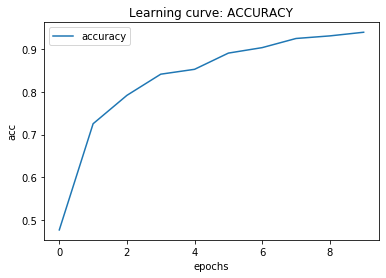

In [8]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.title("Learning curve: ACCURACY")

plt.show()

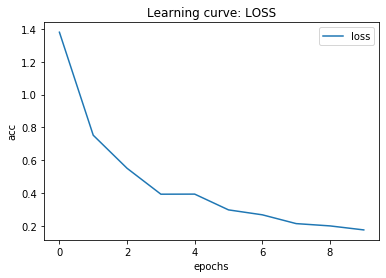

In [9]:
plt.plot(history.history['loss'],label='loss')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.title("Learning curve: LOSS")
plt.show()

In [19]:
model_json = model.to_json()
with open("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\Model\\model_json.json", "w") as json_file:
    json_file.write(model_json)
model.save_model("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\Model\\saved_model.h5",save_format='h5')
model.save_weights("C:\\MyLearnings\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\Model\\model.h5",save_format='h5')

AttributeError: 'Sequential' object has no attribute 'save_model'

In [30]:


 labels = []
#labels= labels.reshape(1, -1)

images= []
i=0
#save as png ad update labels 
print("strt")

#os.remove(file) for file in os.listdir("/content/drive/My Drive/CurrencyRecogition/NewDataset/PositiveImages/10/") if file.endswith('jpg')
print('10Rsload')
file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\test\\airplane\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(0)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\test\\car\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(1)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\test\\cat\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))test
  labels.append(2)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\test\\dog\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(3)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\test\\flower\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(4)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\test\\fruit\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(5)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\test\\motorbike\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(6)
  i+=1

print(np.array(images).shape)

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Kaggle_Datasets\\Natural Images\\natural-images\\data\\test\\person\\*.jpg")
for image in file_paths:
  im = Image.open(image)
  im = im.resize((224,224))
  images.append(np.asarray(im)) #.transpose(1, 0, 2))
  labels.append(7)
  i+=1


#print(*labels)
print(np.array(images).shape)
images = np.array(images)
images = images/255.0
"""
#one hot encoding model = Sequential()
le = LabelBinarizer()
#labels = np.array(labels)
#labels = labels.reshape(-1,1)
le.fit(labels)
labels = le.transform(labels)
print(*labels)
"""

strt
10Rsload
(26, 224, 224, 3)
(293, 224, 224, 3)
(478, 224, 224, 3)
(479, 224, 224, 3)
(621, 224, 224, 3)
(920, 224, 224, 3)
(1007, 224, 224, 3)
(1292, 224, 224, 3)


'\n#one hot encoding model = Sequential()\nle = LabelBinarizer()\n#labels = np.array(labels)\n#labels = labels.reshape(-1,1)\nle.fit(labels)\nlabels = le.transform(labels)\nprint(*labels)\n'

In [27]:
y_pred = model.predict(images)
print(*np.argmax(y_pred,axis =1))

4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 3 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 0 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 0 2 3 3 3 2 3 2 4 2 3 3 2 2 2 2 2 2 2 2 3 2 2 1 2 2 2 2 2 3 2 2 3 2 2 2 2 2 3 3 2 3 3 2 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 2 3 2 2 3 3 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 3 3 4 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

In [25]:
scores = model.evaluate(images, labels, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 96.13%


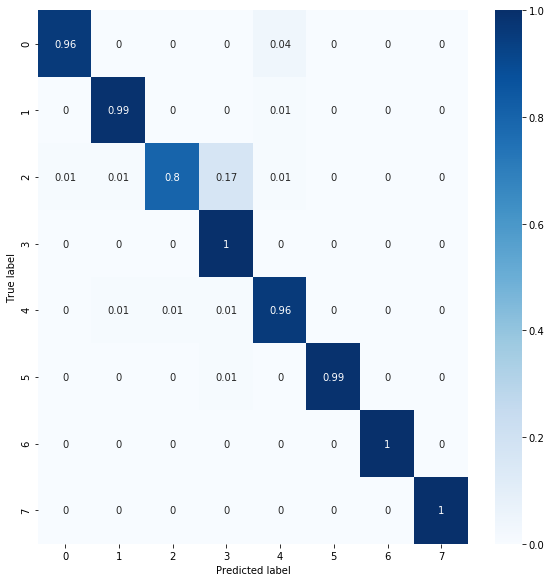

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.99      0.99      0.99       267
           2       0.99      0.80      0.89       185
           3       0.03      1.00      0.05         1
           4       0.96      0.96      0.96       142
           5       1.00      0.99      1.00       299
           6       1.00      1.00      1.00        87
           7       1.00      1.00      1.00       285

    accuracy                           0.96      1292
   macro avg       0.86      0.96      0.85      1292
weighted avg       0.99      0.96      0.97      1292



In [32]:
y_pred_enc = np.argmax(y_pred, axis=1)
#labels_pred_enc = np.argmax(labels_eval, axis=1)

con_mat = tf.math.confusion_matrix(labels, y_pred_enc).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



print('Classification Report')
target_names = ['0', '1','2','3','4','5','6','7']
print(classification_report(labels, y_pred_enc, target_names=target_names))

